# Developing QML model for sine function

## General setup

In [1]:
import pennylane as qml
from pennylane import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2024-08-10 03:35:01.425133: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-10 03:35:01.818128: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-10 03:35:01.818171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-10 03:35:01.884234: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-10 03:35:02.012866: I tensorflow/core/platform/cpu_feature_guar

## Hyper-parameter setting

In [2]:
n_epochs = 20  # Number of optimization epochs
n_train = 50  # Size of the train dataset
n_test = 30  # Size of the test dataset

np.random.seed(0)  # Seed for NumPy random number generator
tf.random.set_seed(0)  # Seed for TensorFlow random number generator
tf.get_logger().setLevel("ERROR")  # Disable TensorFlow logging

## Create a dataset

In [3]:
X_train = np.linspace(0, 2 * np.pi, n_train)
y_train = np.sin(X_train)

X_test = np.linspace(0, 2 * np.pi, n_test)
y_test = np.sin(X_test)

## Define a quantum circuit

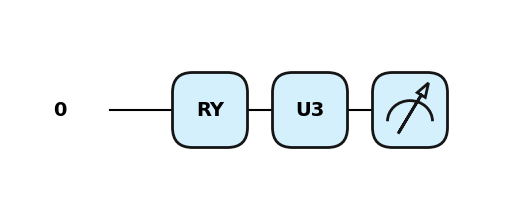

In [4]:
dev = qml.device("lightning.qubit", wires=1)


@qml.qnode(dev, diff_method="adjoint")
def circuit(inputs, params):
    # Encoding of a classical input value
    qml.RY(inputs, wires=0)

    # U3 gate ansatz
    qml.U3(params[0], params[1], params[2], wires=0)

    # Measurement producing a classical output value
    return qml.expval(qml.PauliZ(0))


qml.draw_mpl(circuit, style="pennylane")(0.5, [0.0, 0.0, 0.0])
plt.show()

## Define a model

In [5]:
weight_shapes = {"params": (3)}
qlayer = qml.qnn.KerasLayer(circuit, weight_shapes, output_dim=1)

model = keras.models.Sequential([qlayer])

model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.1  # learning rate needs to be higher than 0.001
    ),
    loss="mean_squared_error",
    metrics=["accuracy"],
)

2024-08-10 03:35:08.533232: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-10 03:35:08.811827: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-10 03:35:08.811871: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-10 03:35:08.822868: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-10 03:35:08.822912: I external/local_xla/xla/stream_executor

## Training

In [6]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/20


2024-08-10 03:35:10.513661: I external/local_xla/xla/service/service.cc:168] XLA service 0x55e30f1c7260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-10 03:35:10.513706: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-08-10 03:35:10.527524: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-10 03:35:10.560207: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1723228510.614028    8559 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 - 1s - loss: 1.2031 - accuracy: 0.1538 - val_loss: 0.9546 - val_accuracy: 0.5000 - 1s/epoch - 106ms/step
Epoch 2/20
13/13 - 1s - loss: 0.6577 - accuracy: 0.4615 - val_loss: 0.1124 - val_accuracy: 0.7500 - 550ms/epoch - 42ms/step
Epoch 3/20
13/13 - 1s - loss: 0.0383 - accuracy: 0.8462 - val_loss: 0.0607 - val_accuracy: 0.8750 - 591ms/epoch - 45ms/step
Epoch 4/20
13/13 - 1s - loss: 0.0286 - accuracy: 1.0000 - val_loss: 1.8457e-04 - val_accuracy: 1.0000 - 553ms/epoch - 43ms/step
Epoch 5/20
13/13 - 1s - loss: 0.0058 - accuracy: 0.8462 - val_loss: 0.0040 - val_accuracy: 0.8750 - 550ms/epoch - 42ms/step
Epoch 6/20
13/13 - 1s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000 - 542ms/epoch - 42ms/step
Epoch 7/20
13/13 - 1s - loss: 7.2204e-04 - accuracy: 0.8462 - val_loss: 1.5395e-04 - val_accuracy: 1.0000 - 627ms/epoch - 48ms/step
Epoch 8/20
13/13 - 1s - loss: 2.3595e-04 - accuracy: 1.0000 - val_loss: 7.3388e-05 - val_accuracy: 1.0000 - 699ms/epoch - 54ms/step
E

## Plot the result

1/1 [==============================] - 0s 47ms/step


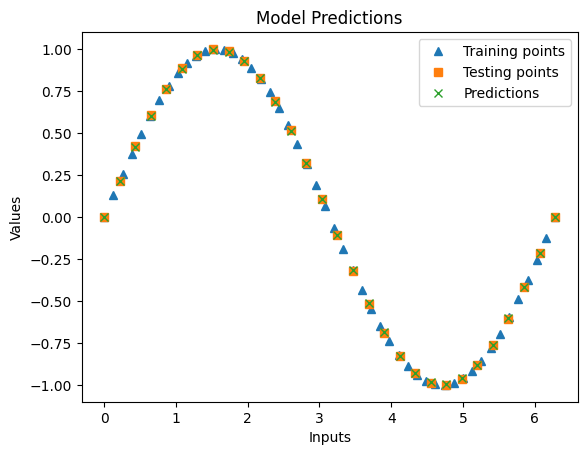

In [7]:
plt.xlabel("Inputs")
plt.ylabel("Values")
plt.title("Model Predictions")
plt.plot(X_train, y_train, "^", label="Training points")
plt.plot(X_test, y_test, "s", label="Testing points")
plt.plot(X_test, model.predict(X_test), "x", label="Predictions")
plt.legend()
plt.show()